In [1]:
import pandas as pd

from sklearn.svm import SVC #algoritmo maquina soporte vecotrial
from sklearn.preprocessing import LabelEncoder  #manipulacion de texto se convierta a numeros
from sklearn.model_selection import train_test_split   #genera de los datos de entrada, dos sets para,
# uno el proceso de entrenaiento
#y el otro para validar el proceso de entrenamiento


from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix,classification_report
import seaborn as asns


from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import Image
import pydotplus

In [3]:
df = pd.read_csv("Bladder Cancer (MSKCC, Eur Urol 2014).csv", sep=',' , header=0)
df.head(4)

,CNA,Concomitant Carcinoma in situ,Death due to disease,Diagnosis Age,Disease Free (Months),Disease Free Status,LN STATUS,Mutation Count,Neoadjuvant Chemotherapy,Overall Survival (Months),Overall Survival Status,Primary histology,pT STAGE,Race Category,Sample Type,Sex,SMOKING STATUS,SURGICAL TREATMENT,Tissue Sequenced,Variant Histology
0,0.000041,No,NO,68,3.16,DiseaseFree,Negative,1,No,3.16,LIVING,UCB,pT3,White,Primary,MALE,Former,Radical Cystectomy,Radical Cystectomy,Yes
1,0.544000,Yes,NO,82,0.68,Recurred/Progressed,Negative,10,No,2.11,LIVING,UCB,pT3,White,Primary,MALE,Never,Radical Cystectomy,Radical Cystectomy,No
2,0.226000,No,NO,59,1.17,Recurred/Progressed,Negative,11,Yes,1.74,LIVING,UCB,pT2,White,Primary,MALE,Active,Radical Cystectomy,Radical Cystectomy,No
3,0.222000,Yes,YES,.,0.42,Recurred/Progressed,Positive,13,No,0.56,DECEASED,UCB,pT4,White,Primary,MALE,Never,Radical Cystectomy,Radical Cystectomy,No


In [4]:
df.dtypes


CNA                              float64
Concomitant Carcinoma in situ     object
Death due to disease              object
Diagnosis Age                     object
Disease Free (Months)             object
Disease Free Status               object
LN STATUS                         object
Mutation Count                    object
Neoadjuvant Chemotherapy          object
Overall Survival (Months)         object
Overall Survival Status           object
Primary histology                 object
pT STAGE                          object
Race Category                     object
Sample Type                       object
Sex                               object
SMOKING STATUS                    object
SURGICAL TREATMENT                object
Tissue Sequenced                  object
Variant Histology                 object
dtype: object

In [5]:
df.isna().sum()

CNA                               0
Concomitant Carcinoma in situ     0
Death due to disease             11
Diagnosis Age                     1
Disease Free (Months)            11
Disease Free Status              11
LN STATUS                        13
Mutation Count                    0
Neoadjuvant Chemotherapy          0
Overall Survival (Months)        11
Overall Survival Status          11
Primary histology                 0
pT STAGE                          0
Race Category                     3
Sample Type                       0
Sex                               0
SMOKING STATUS                    0
SURGICAL TREATMENT                2
Tissue Sequenced                  0
Variant Histology                 0
dtype: int64

In [6]:
# Quitar los valores nulos
df = df.dropna()

# Mostrar las primeras 4 filas después de quitar los nulos
print("\nDataFrame después de quitar los nulos:")
print(df.head(4))


DataFrame después de quitar los nulos:
        CNA Concomitant Carcinoma in situ Death due to disease Diagnosis Age  \
0  0.000041                            No                   NO            68   
1  0.544000                           Yes                   NO            82   
2  0.226000                            No                   NO            59   
3  0.222000                           Yes                  YES             .   

  Disease Free (Months)  Disease Free Status LN STATUS Mutation Count  \
0                  3.16          DiseaseFree  Negative              1   
1                  0.68  Recurred/Progressed  Negative             10   
2                  1.17  Recurred/Progressed  Negative             11   
3                  0.42  Recurred/Progressed  Positive             13   

  Neoadjuvant Chemotherapy Overall Survival (Months) Overall Survival Status  \
0                       No                      3.16                  LIVING   
1                       No       

In [7]:
df.isna().sum()


CNA                              0
Concomitant Carcinoma in situ    0
Death due to disease             0
Diagnosis Age                    0
Disease Free (Months)            0
Disease Free Status              0
LN STATUS                        0
Mutation Count                   0
Neoadjuvant Chemotherapy         0
Overall Survival (Months)        0
Overall Survival Status          0
Primary histology                0
pT STAGE                         0
Race Category                    0
Sample Type                      0
Sex                              0
SMOKING STATUS                   0
SURGICAL TREATMENT               0
Tissue Sequenced                 0
Variant Histology                0
dtype: int64

In [8]:
# Definir las características (features) y la nueva etiqueta (label)
features = ['CNA', 'Concomitant Carcinoma in situ', 'Death due to disease',
            'Diagnosis Age', 'Disease Free (Months)', 'Disease Free Status',
            'LN STATUS', 'Mutation Count', 'Neoadjuvant Chemotherapy',
            'Overall Survival (Months)', 'Primary histology', 'pT STAGE',
            'Race Category', 'Sample Type', 'Sex', 'SMOKING STATUS',
            'SURGICAL TREATMENT', 'Tissue Sequenced', 'Variant Histology']

label = 'Overall Survival Status'

In [9]:
le = LabelEncoder()
y = le.fit_transform(df[label])

In [10]:
# Crear objetos LabelEncoder para cada columna categórica
le_cna = LabelEncoder()
le_concomitant_carcinoma = LabelEncoder()
le_death_due_to_disease = LabelEncoder()
le_diagnosis_age = LabelEncoder()
le_disease_free_months = LabelEncoder()
le_disease_free_status = LabelEncoder()
le_ln_status = LabelEncoder()
le_mutation_count = LabelEncoder()
le_neoadjuvant_chemo = LabelEncoder()
le_overall_survival_months = LabelEncoder()
le_primary_histology = LabelEncoder()
le_pt_stage = LabelEncoder()
le_race_category = LabelEncoder()
le_sample_type = LabelEncoder()
le_sex = LabelEncoder()
le_smoking_status = LabelEncoder()
le_surgical_treatment = LabelEncoder()
le_tissue_sequenced = LabelEncoder()
le_variant_histology = LabelEncoder()

# Aplicar la codificación de etiquetas a cada columna
df['CNA'] = le_cna.fit_transform(df['CNA'])
df['Concomitant Carcinoma in situ'] = le_concomitant_carcinoma.fit_transform(df['Concomitant Carcinoma in situ'])
df['Death due to disease'] = le_death_due_to_disease.fit_transform(df['Death due to disease'])
df['Diagnosis Age'] = le_diagnosis_age.fit_transform(df['Diagnosis Age'])
df['Disease Free (Months)'] = le_disease_free_months.fit_transform(df['Disease Free (Months)'])
df['Disease Free Status'] = le_disease_free_status.fit_transform(df['Disease Free Status'])
df['LN STATUS'] = le_ln_status.fit_transform(df['LN STATUS'])
df['Mutation Count'] = le_mutation_count.fit_transform(df['Mutation Count'])
df['Neoadjuvant Chemotherapy'] = le_neoadjuvant_chemo.fit_transform(df['Neoadjuvant Chemotherapy'])
df['Overall Survival (Months)'] = le_overall_survival_months.fit_transform(df['Overall Survival (Months)'])
df['Primary histology'] = le_primary_histology.fit_transform(df['Primary histology'])
df['pT STAGE'] = le_pt_stage.fit_transform(df['pT STAGE'])
df['Race Category'] = le_race_category.fit_transform(df['Race Category'])
df['Sample Type'] = le_sample_type.fit_transform(df['Sample Type'])
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['SMOKING STATUS'] = le_smoking_status.fit_transform(df['SMOKING STATUS'])
df['SURGICAL TREATMENT'] = le_surgical_treatment.fit_transform(df['SURGICAL TREATMENT'])
df['Tissue Sequenced'] = le_tissue_sequenced.fit_transform(df['Tissue Sequenced'])
df['Variant Histology'] = le_variant_histology.fit_transform(df['Variant Histology'])
y

array([2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2])

In [11]:
xtrain, xtest,ytrain, ytest = train_test_split(df[features],y,test_size=0.20, random_state=0)

In [12]:
svm = SVC (probability=True)
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)

In [13]:
# prediccion ~ ytest
prediccion_lista=prediccion.tolist()
ytest_lista = ytest.tolist()

i = 0

for pred in prediccion_lista:
  print(f"{pred} -> {ytest[i]}")
  i+=1

2 -> 2
2 -> 2
2 -> 1
2 -> 2
1 -> 1
2 -> 2
1 -> 2
1 -> 1
2 -> 2
1 -> 1
2 -> 1
1 -> 1
2 -> 2
2 -> 2
2 -> 2
1 -> 1
1 -> 1
1 -> 1
2 -> 2


score:  0.8421052631578947
recall_score:  0.8421052631578947
f1_score:  0.8421052631578947
classification_report=               precision    recall  f1-score   support

           1       0.78      0.88      0.82         8
           2       0.90      0.82      0.86        11

    accuracy                           0.84        19
   macro avg       0.84      0.85      0.84        19
weighted avg       0.85      0.84      0.84        19



<Axes: >

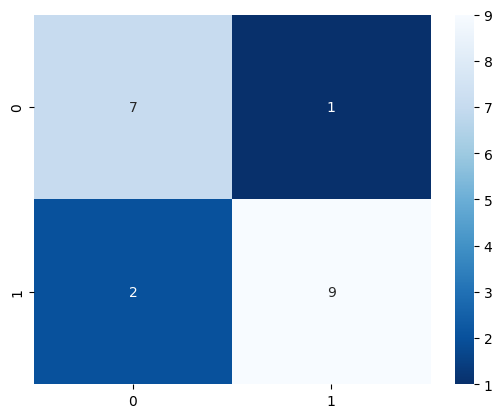

In [15]:
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

cf= confusion_matrix(prediccion, ytest)
asns.heatmap(cf, annot=True, cmap='Blues_r')

In [16]:
#DecisionTreeClassifier
svm = DecisionTreeClassifier (max_depth=5)
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)

In [17]:

import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
import pydotplus


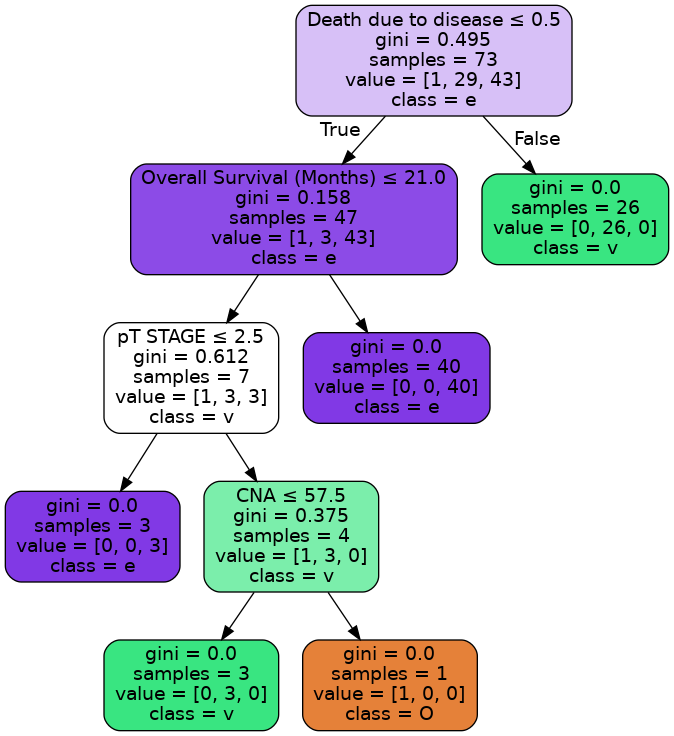

In [18]:
dot_data = export_graphviz(modelo, out_file=None,
                           feature_names=features,
                           class_names=label,
                           filled=True, rounded=True,
                           special_characters=True)


graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())  

score:  0.9473684210526315
recall_score:  0.9473684210526315
f1_score:  0.9473684210526315
classification_report=               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00        10

    accuracy                           0.95        19
   macro avg       0.63      0.67      0.65        19
weighted avg       0.90      0.95      0.92        19



/home/xexeyt/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/xexeyt/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/xexeyt/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

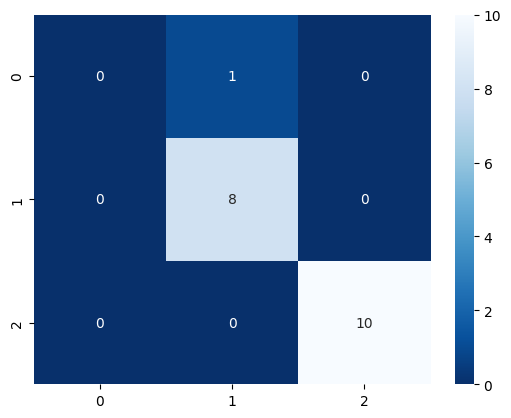

In [19]:
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

cf= confusion_matrix(prediccion, ytest)
asns.heatmap(cf, annot=True, cmap='Blues_r')

In [20]:
from sklearn.ensemble import GradientBoostingClassifier


score:  0.9473684210526315
recall_score:  0.9473684210526315
f1_score:  0.9473684210526315
classification_report=               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00        10

    accuracy                           0.95        19
   macro avg       0.63      0.67      0.65        19
weighted avg       0.90      0.95      0.92        19



/home/xexeyt/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/xexeyt/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/xexeyt/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

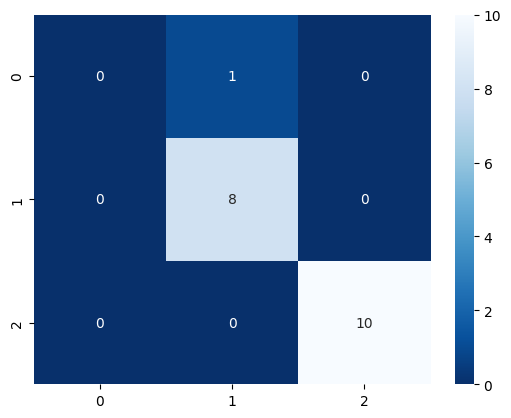

In [21]:
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

cf= confusion_matrix(prediccion, ytest)
asns.heatmap(cf, annot=True, cmap='Blues_r')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [23]:
#modelo Naive Bayes
svm = GaussianNB()
modelo = svm.fit(xtrain, ytrain)
prediccion = modelo.predict(xtest)


score:  0.8421052631578947
recall_score:  0.8421052631578947
f1_score:  0.8421052631578947
classification_report=               precision    recall  f1-score   support

           1       0.67      1.00      0.80         6
           2       1.00      0.77      0.87        13

    accuracy                           0.84        19
   macro avg       0.83      0.88      0.83        19
weighted avg       0.89      0.84      0.85        19



<Axes: >

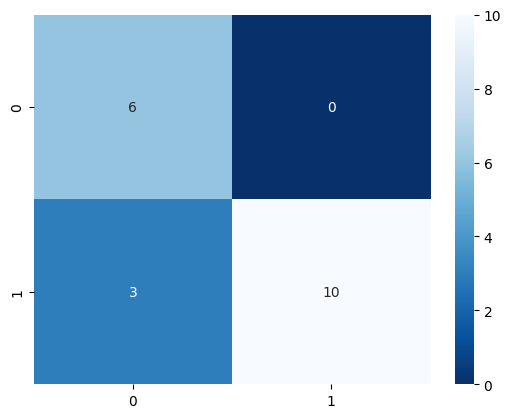

In [24]:
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

cf= confusion_matrix(prediccion, ytest)
asns.heatmap(cf, annot=True, cmap='Blues_r')

In [25]:
from sklearn.ensemble import RandomForestClassifier


score:  0.8421052631578947
recall_score:  0.8421052631578947
f1_score:  0.8421052631578947
classification_report=               precision    recall  f1-score   support

           1       0.67      1.00      0.80         6
           2       1.00      0.77      0.87        13

    accuracy                           0.84        19
   macro avg       0.83      0.88      0.83        19
weighted avg       0.89      0.84      0.85        19



<Axes: >

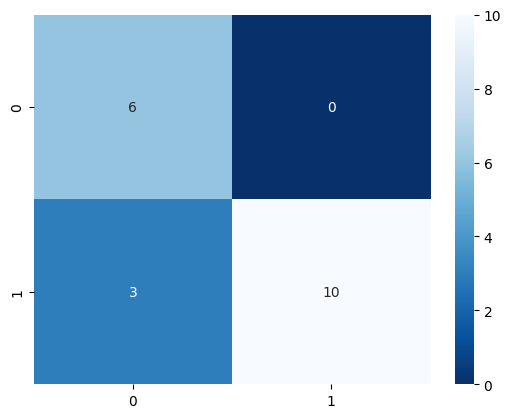

In [26]:
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

cf= confusion_matrix(prediccion, ytest)
asns.heatmap(cf, annot=True, cmap='Blues_r')